## Homework 5
### Meghan Edgerton
### Math 472 Spring 2020

### Question 1:
The data set $(y_{i},z_{i})$ for $i=1,...,n,$ where $z_{i}=(z_{1i},z_{2i})$, follows the following model:
$y_{i}=\theta_{0}exp(-\theta_{1}z_{1i} - \theta_{2}z_{2i}) + \epsilon_{i}$, where $\epsilon_{i}$ is the random error.
Task: Given the attached data set with filename dataHW5-1.csv, (note that the 1st column is $y$, the 2nd column is $z_{1}$), estimate the model parameters $\theta = [\theta_{0},\theta_{1},\theta_{2}]^{T}$ using Gauss-Newton method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import scipy as sp
import math
import scipy.misc

# importing the data
data = pd.read_csv('dataHW5-1.csv',delimiter=' ', header = 0, names = ["y", "z1", "z2"])

y = data['y'].to_numpy()
z1 = data['z1'].to_numpy().T
z2 = data['z2'].to_numpy().T

z = data[['z1','z2']].to_numpy().T

In [2]:
# Implementing the Gauss-Newton Method
theta = np.array([-1,1,1]).reshape(3,1)
eps = np.random.normal(0,1,100)
theta0 = np.asarray([theta[0]])
theta1 = np.asarray([theta[1]])
theta2 = np.asarray([theta[2]])
    
def f(theta,z1,z2):
    fvals = []
    for i in range(len(y)):
        fvals.append(theta[0]*np.exp(-theta[1]*z1[i]-theta[2]*z2[i]))
    return fvals

# Calculating the A matrix, the gradient of the function f
def Acalc(theta,z1,z2):
    Amatrix = []
    for i in range(len(y)):
        p0 = np.exp(-theta[1]*z1[i] - theta[2]*z2[i])
        p1 = theta[0]*(-z1[i])*np.exp(-theta[1]*z1[i] - theta[2]*z2[i])
        p2 = theta[0]*(-z2[i])*np.exp(-theta[1]*z1[i] - theta[2]*z2[i])
        val = np.asarray([p0, p1, p2])
        Amatrix.append(val.T)
    Amatrix = np.asarray(Amatrix).reshape((50,3))
    return Amatrix

Amatrix = Acalc(theta,z1,z2)
functionvals = np.asarray(f(theta,z1,z2))

# Creating the X matrix 
def Xmatrix(y):
    return y - functionvals
X = Xmatrix(data)

# Using the updating equation to find estimated parameters of theta
for i in range(50):
    theta = theta + np.linalg.inv(Amatrix.transpose().dot(Amatrix)).dot(Amatrix.transpose().dot(X))
print(theta)


[[ -78.18838892 -190.28127617 -283.42672677]
 [  94.25869915  718.79551247  355.62857597]
 [1190.9411383   254.22617754  770.87029464]]


Text(0.5, 0.92, 'Surface Plot of Fitted Model')

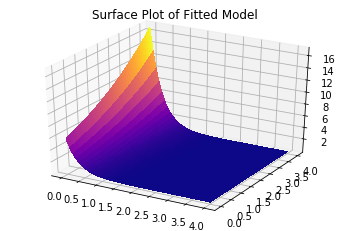

In [3]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Defining the surface plot, using the correct values of theta (hardcoded)
def surfaceplot(z1, z2):
    t0 = 5.71460881 
    t1 = 2.98606949
    t2 = -0.27215695
    return (t0*np.exp(-t1*z1 -t2*z2))

# Creating the mesh grid
z1s = np.linspace(0, 4, 400)
z2s = np.linspace(0, 4, 400)
Z1, Z2 = np.meshgrid(z1s, z2s)
Y = surfaceplot(Z1, Z2)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Z1, Z2, Y, cmap=cm.plasma,
                       linewidth=0, antialiased=False)
ax.set_title('Surface Plot of Fitted Model')


### Question 2:
Reproduce the solution to Example 4.2 from Computational Statistics

In [4]:
x = [85, 196, 341]
n = [0,0,0,0,0,0]
p = [(1/3),(1/3),(1/3)]
iters = 40

# Implementing the expectation step of the EM algorithm
def expectation(x,p):
    ncc = (x[0]*(p[0]**2))/((p[0]**2)+2*p[0]*p[1]+2*p[0]*p[2])
    nci = (2*x[0]*p[0]*p[1])/((p[0]**2)+2*p[0]*p[1]+2*p[0]*p[2])
    nct = (2*x[0]*p[0]*p[2])/((p[0]**2)+2*p[0]*p[1]+2*p[0]*p[2])
    nii = (x[1]*(p[1]**2))/((p[1]**2)+2*p[1]*p[2])
    nit = (2*x[1]*p[1]*p[2])/((p[1]**2)+2*p[1]*p[2])
    n = [ncc,nci,nct,nii,nit,x[2]]
    return n
    
# Implementing the maximation step of the EM algorithm
def maximization(x,n):
    pc = (2*n[0]+n[1]+n[2])/(2*np.sum(x))
    pi = (2*n[3]+n[4]+n[1])/(2*np.sum(x))
    pt = (2*n[5]+n[2]+n[4])/(2*np.sum(x))
    p = [pc,pi,pt]
    return p

# Creating arrays of zeros for table format purposes
p0 = np.zeros((40,1))
p1 = np.zeros((40,1))
p2 = np.zeros((40,1))

# Running the EM algorithm
for i in range(iters):
    n = expectation(x,p)
    p = maximization(x,n)
    p0[i] = p[0]
    p1[i] = p[1]
    p2[i] = p[2]
    i+=1
    
# Creating a data frame with the first 8 iterations
ps = np.hstack([p0,p1,p2])
em = pd.DataFrame(ps,columns = ['Pc','Pi','Pt'])
em = em.iloc[0:9,:]
em

,Pc,Pi,Pt
0,0.081994,0.237406,0.680600
1,0.071249,0.197870,0.730881
2,0.070852,0.190360,0.738788
3,0.070837,0.189023,0.740140
4,0.070837,0.188787,0.740376
5,0.070837,0.188745,0.740418
6,0.070837,0.188738,0.740425
7,0.070837,0.188737,0.740426
8,0.070837,0.188737,0.740427
